Importing the Libraries

In [27]:
import numpy as np
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline
#Import warnings
import warnings
warnings.filterwarnings('ignore')

Import the data

In [28]:
data = read_excel("IMDb_Movies_India.xlsx")
print(data)

                                     Name    Year            Genre  Rating  \
0                                             NaN            Drama     NaN   
1      #Gadhvi (He thought he was Gandhi)  2019.0            Drama     7.0   
2                             #Homecoming  2021.0   Drama, Musical     NaN   
3                                 #Yaaram  2019.0  Comedy, Romance     4.4   
4                       ...And Once Again  2010.0            Drama     NaN   
...                                   ...     ...              ...     ...   
15504                 Zulm Ko Jala Doonga  1988.0           Action     4.6   
15505                               Zulmi  1999.0    Action, Drama     4.5   
15506                           Zulmi Raj  2005.0           Action     NaN   
15507                       Zulmi Shikari  1988.0           Action     NaN   
15508                        Zulm-O-Sitam  1998.0    Action, Drama     6.2   

      Votes            Director           Actor 1             A

In [29]:
data.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [30]:
data.tail()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,1988.0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999.0,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005.0,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988.0,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,1998.0,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Genre     13632 non-null  object 
 3   Rating    7919 non-null   float64
 4   Votes     7920 non-null   object 
 5   Director  14984 non-null  object 
 6   Actor 1   13892 non-null  object 
 7   Actor 2   13125 non-null  object 
 8   Actor 3   12365 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.1+ MB


In [32]:
shape=data.shape
print(f"Number of rows:{shape[0]},Number of columns:{shape[1]}")

Number of rows:15509,Number of columns:9


In [33]:
data.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,1987.012215,5.841621
std,25.416689,1.381777
min,1913.000000,1.100000
25%,1968.000000,4.900000
50%,1991.000000,6.000000
75%,2009.000000,6.800000
max,2022.000000,10.000000


Data Filtering and Preprocessing

In [34]:
new_data=data.columns
print(new_data)

Index(['Name', 'Year', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3'],
      dtype='object')


In [35]:
rating=data['Rating'].value_counts()
print("Rating Distribution:\n", rating)

Rating Distribution:
 6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64


In [36]:
data.drop_duplicates(inplace=True)

In [37]:
new_data=['Name','Year','Votes','Rating']
data.dropna(subset=new_data, inplace=True)
missing_val=data.isna().sum()
print(missing_val)

Name          0
Year          0
Genre       102
Rating        0
Votes         0
Director      5
Actor 1     125
Actor 2     200
Actor 3     292
dtype: int64


In [38]:
data

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992.0,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989.0,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988.0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999.0,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [39]:
name_rating= data[['Name','Rating']]
name_rating.head()

,Name,Rating
1,#Gadhvi (He thought he was Gandhi),7.0
3,#Yaaram,4.4
5,...Aur Pyaar Ho Gaya,4.7
6,...Yahaan,7.4
8,?: A Question Mark,5.6


Visualization of Data

<function matplotlib.pyplot.show(close=None, block=None)>

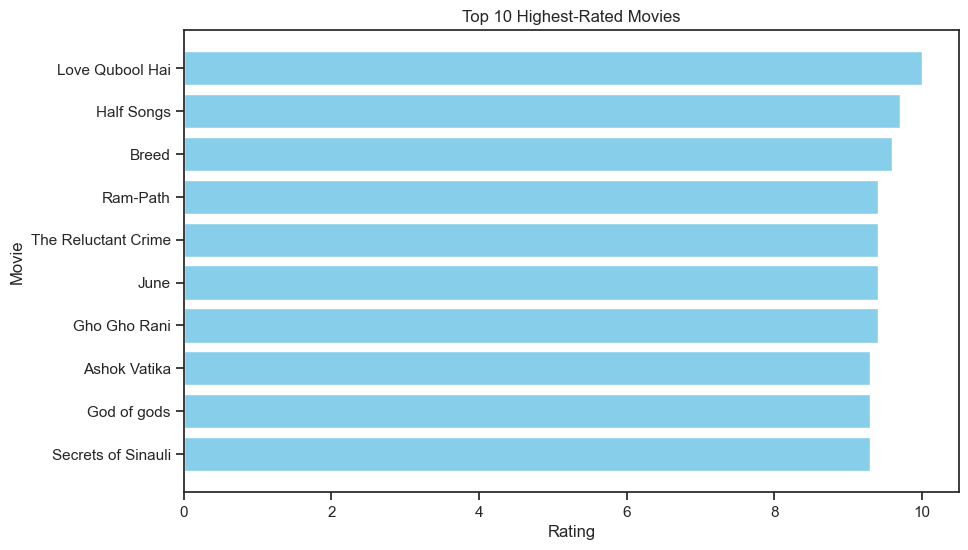

In [40]:
top_rated_movies= data.sort_values(by='Rating',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_rated_movies['Name'], top_rated_movies['Rating'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 Highest-Rated Movies')
plt.gca().invert_yaxis()
plt.show

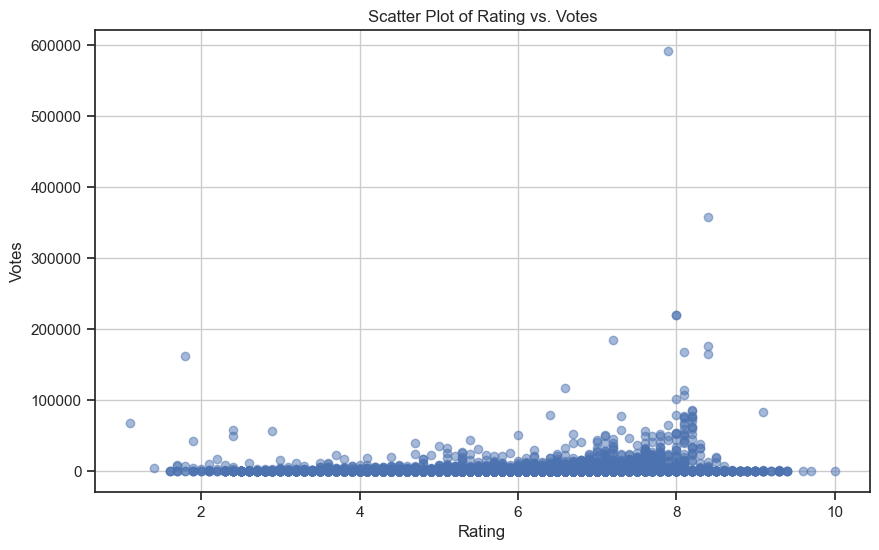

In [41]:
data['Votes']=to_numeric(data['Votes'],errors='coerce')
plt.figure(figsize=(10,6))
plt.scatter(data['Rating'], data['Votes'], alpha=0.5, color='b')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter Plot of Rating vs. Votes')
plt.grid(True)

Text(0.5, 1.0, 'Top 10 Actors by Number of Movies Performed')

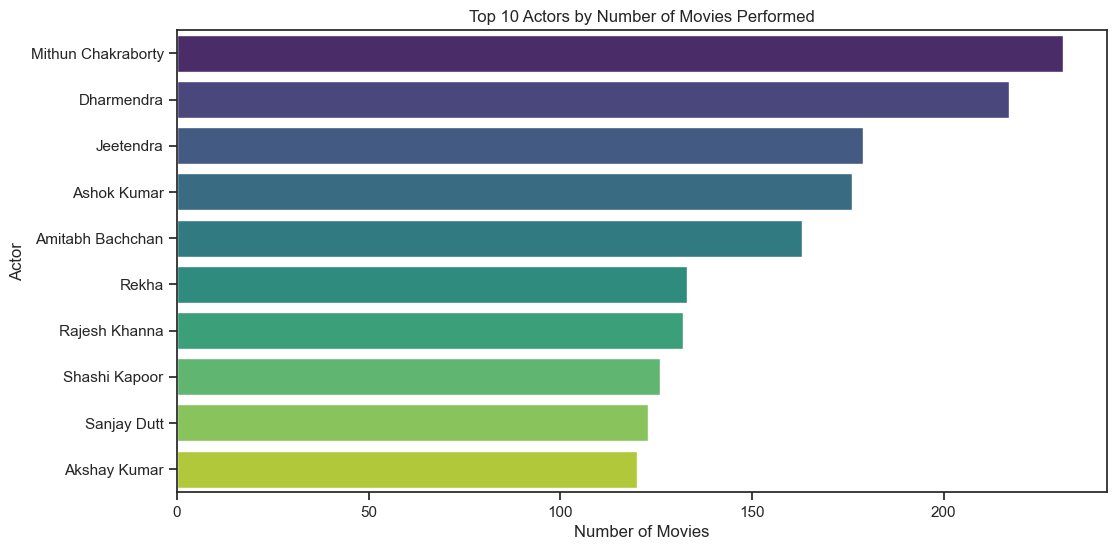

In [42]:
actors=concat([data['Actor 1'], data['Actor 2'], data['Actor 3']])
actor_counts= actors.value_counts().reset_index()
actor_counts.columns= ['Actor', 'Number of Movies']
plt.figure(figsize=(12,6))
sns.barplot(x='Number of Movies', y='Actor', data= actor_counts.head(10), palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of Movies Performed')

Text(0.5, 1.0, 'Correlation Heatmap')

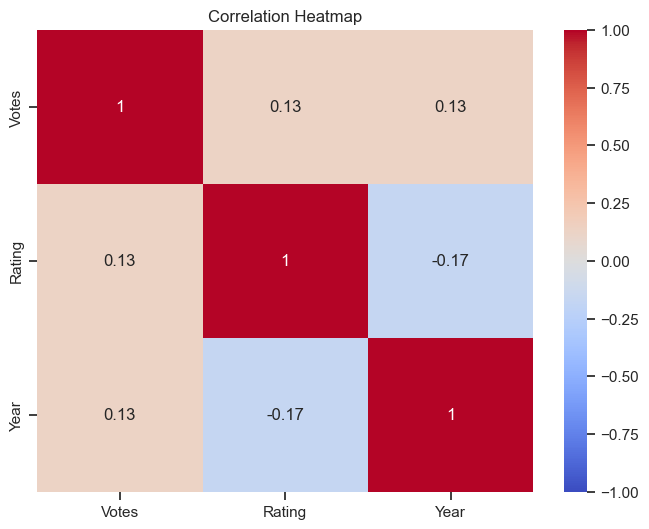

In [43]:
numerical_columns = ['Votes', 'Rating', 'Year']
correlation_matrix= data[numerical_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

Text(0.5, 1.02, 'Pair Plot of Voting, Rating and Year')

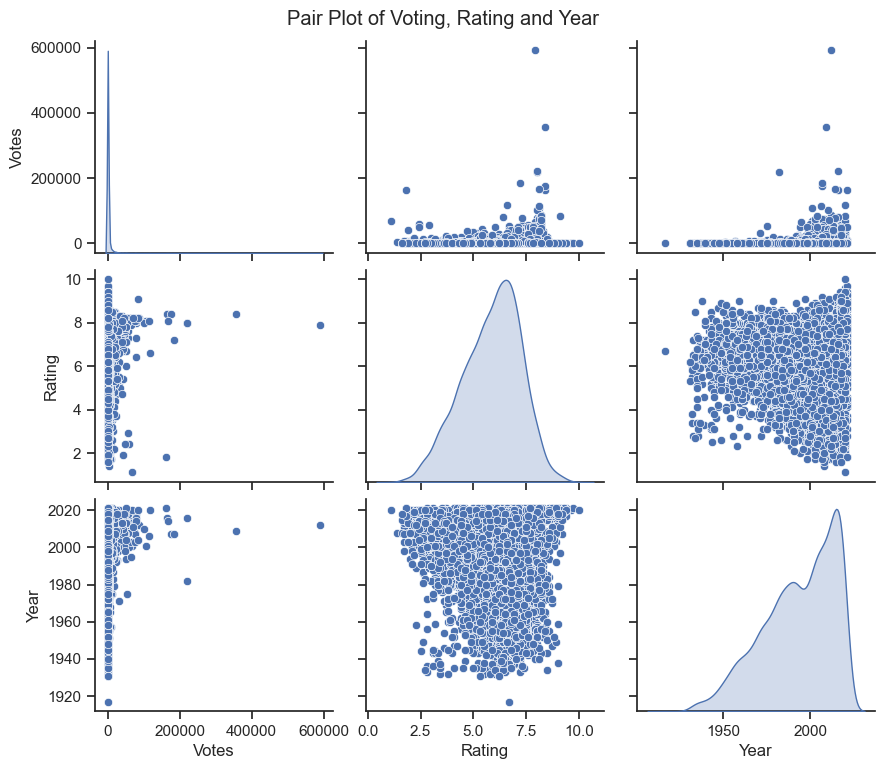

In [44]:
columns_of_interest= ['Votes', 'Rating', 'Year']
sns.set(style='ticks')
sns.pairplot(data[columns_of_interest], diag_kind='kde', markers='o', palette='viridis',height=2.5,aspect=1.2)
plt.suptitle('Pair Plot of Voting, Rating and Year',y=1.02)

Sorting data

In [45]:
data_sort=data.sort_values(by='Votes',ascending=False)
data_sort['Vote_Count_percentile']=data_sort['Votes'].rank(pct=True)*100
data_sort.reset_index(drop=True,inplace=True)
print(data_sort[['Name','Votes','Vote_Count_percentile']])

                         Name   Votes  Vote_Count_percentile
0                  Life of Pi  591417             100.000000
1                    3 Idiots  357889              99.987372
2                        Lion  220526              99.974744
3                      Gandhi  220118              99.962116
4      The Darjeeling Limited  185127              99.949489
...                       ...     ...                    ...
7914                  Intezar       5               1.041798
7915          Insaf Ka Mandir       5               1.041798
7916                  Bharosa       5               1.041798
7917      Bhawani Mandi Tesan       5               1.041798
7918  Kanoon Meri Mutthi Mein       5               1.041798

[7919 rows x 3 columns]


In [46]:
data.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [47]:
data=data.dropna(subset=['Votes'])
data.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Model Training and Testing 

In [48]:
data['Year']=data['Year'].astype(str)
data['Year'] = data['Year'].str.extract('(\d+)').astype(float)
X= data[['Year', 'Votes']]
Y=data['Rating']
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

In [49]:
model=LinearRegression()

In [50]:
model.fit(X_train,Y_train)

LinearRegression()

In [51]:
Y_predict=model.predict(X_test)

In [53]:
mn=mean_absolute_error(Y_test, Y_predict)
mnse=mean_squared_error(Y_test,Y_predict, squared=False)
r2=r2_score(Y_test,Y_predict)
print(f"Mean Absolute Error:{mn}")
print(f"Root Mean Squared Error:{mnse}")
print(f"R-squared (R2) Score:{r2}")

Mean Absolute Error:1.0626096373868938
Root Mean Squared Error:1.3260443154896855
R-squared (R2) Score:0.05419244135248502


Prediction in Visualization for Better Understanding

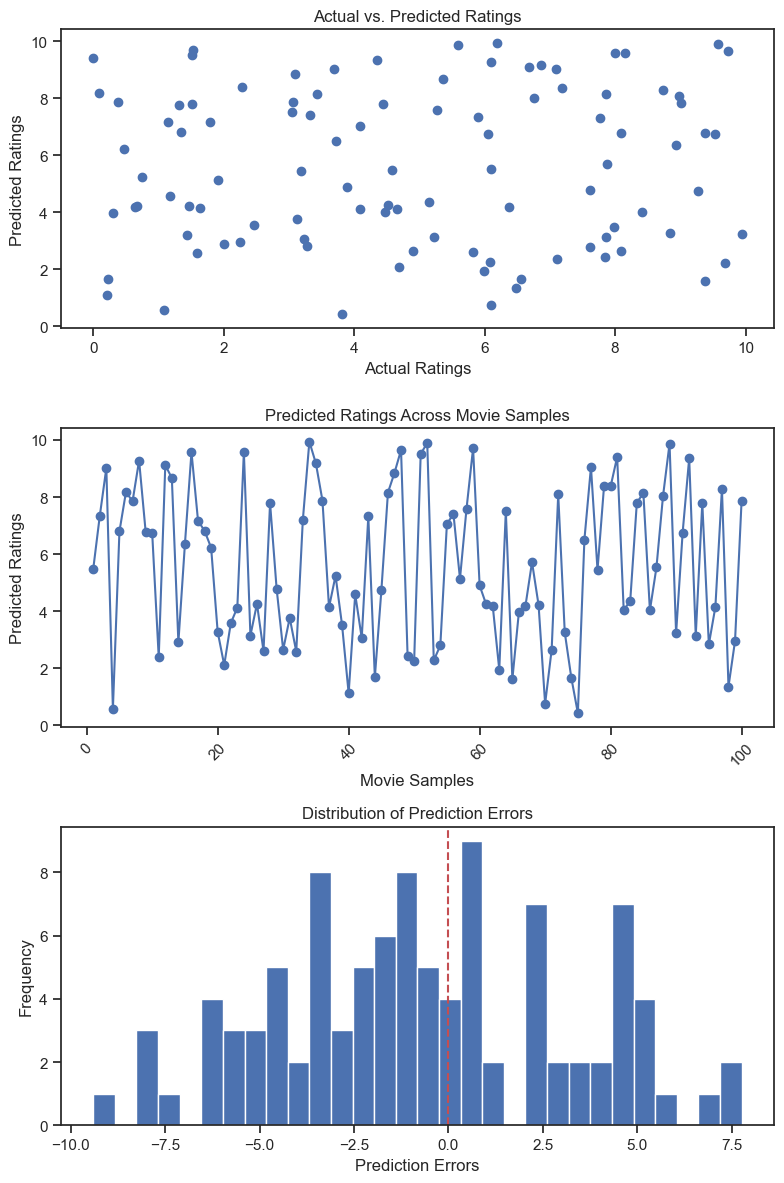

In [55]:
y_test = np.random.rand(100) * 10 # Actual ratings 
y_pred = np.random.rand(100) * 10 # Predicted ratings
errors = y_test - y_pred
fig, axs = plt.subplots(3, 1, figsize =(8, 12)) 

axs[0].scatter (y_test, y_pred) 
axs[0].set_xlabel("Actual Ratings")
axs[0].set_ylabel("Predicted Ratings")
axs[0].set_title("Actual vs. Predicted Ratings")

# Line plot
movie_samples = np.arange(1, len (y_pred) + 1) 
axs [1].plot (movie_samples, y_pred, marker = 'o', linestyle = '-')
axs[1].set_xlabel("Movie Samples")
axs[1].set_ylabel("Predicted Ratings")
axs[1].set_title("Predicted Ratings Across Movie Samples")
axs[1].tick_params (axis = 'x', rotation = 45)

# Histogram
axs[2].hist (errors, bins = 30)
axs [2].set_xlabel("Prediction Errors")
axs [2].set_ylabel("Frequency")
axs [2].set_title("Distribution of Prediction Errors")
axs [2].axvline(x = 0, color = 'r', linestyle = '--')

plt.tight_layout()

plt.show()
